In [25]:
from random import choices, sample
from math import perm, comb

def urna():
    return 5*['r']+3*['a']+2*['v']

def extragere(l:list):
    return sample(l, 3)

extragere(urna())

def p_A(times:int):
    cf = 0
    for i in range(times):
        valid = False
        l = extragere(urna())
        for e in l:
            if e == 'r':
                valid = True
        if valid:
            cf += 1
    return cf/times

def p_AintersectatB(times:int):
    cf = 0
    for i in range(times):
        l = extragere(urna())
        multime = set(l)
        multime = list(multime)
        if len(multime) == 1 and multime[0] == 'r':
            cf +=1
    return cf/times

def p_BcontitionatA(times:int):
    return p_AintersectatB(times)/p_A(times)
    
p_BcontitionatA(10000)


0.08921004020428122

In [34]:
def p_A():
    #1-p(niciuna rosie)
    #iau 3 bile din cele 5 care nu sunt rosii
    cf = comb(5,3)
    #iau 3 bile din toate cele 10 bile
    cp = comb(10,3)
    return 1-cf/cp

def p_AintersectatB():
    #toate sa fie rosii
    #iau 3 bile din cele 5 rosii
    cf = comb(5,3)
    #iau 3 bile din toate cele 10 bile
    cp = comb(10,3)
    return cf/cp

def p_BcontitionatA():
    return p_AintersectatB()/p_A()
    
p_BcontitionatA()


0.09090909090909091

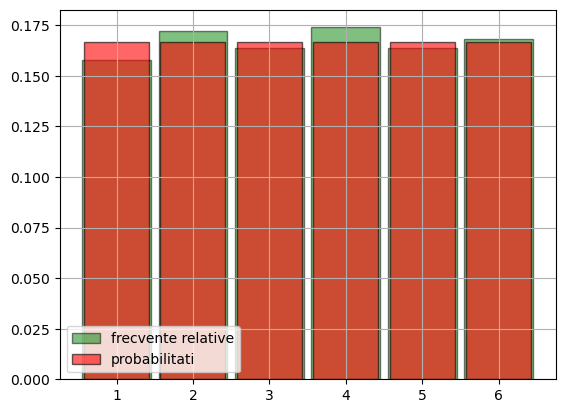

In [182]:
from random import randrange
from matplotlib.pyplot import bar, hist, grid, show, legend

data = [randrange(1,7) for _ in range(500)]
bin_edges = [k+0.5 for k in range(7)]
hist(data, bin_edges, density = True, rwidth = 0.9, color = 'green', edgecolor = 'black',alpha = 0.5, label = 'frecvente relative')
distribution = dict([(i,1/6) for i in range(1,7)])
bar(distribution.keys(), distribution.values(), width = 0.85, color = 'red', edgecolor = 'black',alpha= 0.6, label = 'probabilitati')
legend(loc = 'lower left')
grid()
show()

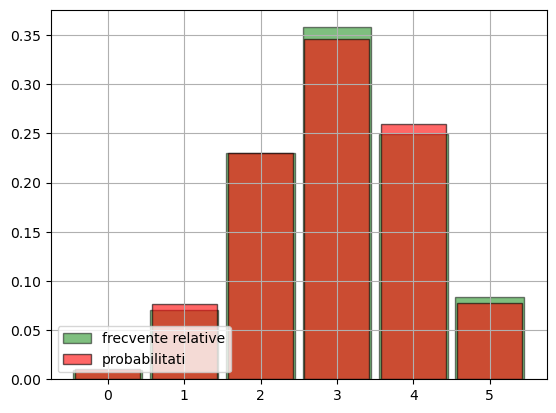

In [236]:
from random import randrange
from matplotlib.pyplot import bar, hist, grid, show, legend
from scipy.stats import binom

data = binom.rvs(n = 5, p = 0.6, size = 1000)
bin_edges = [k+0.5 for k in range(-1,6)]
hist(data, bin_edges, density = True, rwidth = 0.9, color = 'green', edgecolor = 'black',alpha = 0.5, label = 'frecvente relative')
distribution = dict([(i,binom.pmf(i,5,0.6)) for i in range(0,6)])
bar(distribution.keys(), distribution.values(), width = 0.85, color = 'red', edgecolor = 'black', alpha= 0.6, label = 'probabilitati')
legend(loc = 'lower left')
grid()
show()



In [180]:
data = binom.rvs(n = 5, p = 0.6, size = 10000)
def estimare():
    cnt = 0
    for el in data:
        if 2 < el <= 5:
            cnt += 1
    return cnt/len(data)
print("Probabilitate estimata:",estimare())

def probabilitate():
    return binom.pmf(3,5,0.6)+binom.pmf(4,5,0.6)+binom.pmf(5,5,0.6) 
print("Probabilitate teoretica:",probabilitate())

Probabilitate estimata: 0.6893
Probabilitate teoretica: 0.68256


Probabilitatea prin simulari ca suma obtinuta sa fie 10: 0.125
Probabilitatea teoretica ca suma obtinuta sa fie 10: 0.125


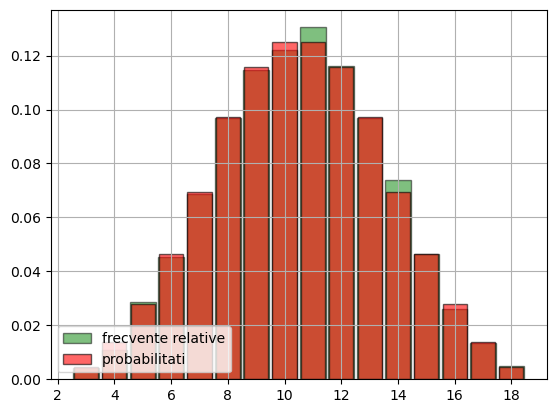

In [1]:
#tema
from random import randrange
from matplotlib.pyplot import bar, hist, grid, show, legend
from scipy.stats import binom

#numarul de moduri in care il poti scrie pe s ca suma de 3 cifre din [1,6]
def numarPosibilitati(s:int):
    cnt = 0
    for i in range(1,7):
        for j in range(1,7):
            for k in range(1,7):
                if i+j+k == s:
                    cnt += 1
    return cnt

#probabilitatea ca la aruncarea a 3 zaruri, suma sa fie s
def probabilitateSuma(s:int):
    return numarPosibilitati(s)/(6**3)

def generareDateRandom(times:int):
    data = []
    for _ in range(times):
        s = 0
        for _ in range(3):
            s += randrange(1,7)
        data.append(s)
    return data

def probabilitateSimulari(times:int, s:int):
    date = generareDateRandom(times)
    cnt = 0
    for el in date:
        if s == el:
            cnt += 1
    return cnt/times

print("Probabilitatea prin simulari ca suma obtinuta sa fie 10:",probabilitateSimulari(10000,10))
print("Probabilitatea teoretica ca suma obtinuta sa fie 10:",probabilitateSuma(10))

bin_edges = [k+0.5 for k in range(2,19)]
hist(generareDateRandom(10000), bin_edges, density = True, rwidth = 0.9, color = 'green', edgecolor = 'black',alpha = 0.5, label = 'frecvente relative')

distribution = dict([(i,probabilitateSuma(i)) for i in range(3,19)])
bar(distribution.keys(), distribution.values(), width = 0.85, color = 'red', edgecolor = 'black', alpha= 0.6, label = 'probabilitati')
legend(loc = 'lower left')
grid()
show()
